#### Import Library

In [1]:
import pandas as pd
import numpy as np

np.warnings.filterwarnings('ignore')

#### Import Dataset

Dataset ini merupakan respon subyek penelitian terhadap depresi, stress dan kecemasan. Data yang dimasukkan merupakan data yang dihimpun pada tahun 2017-2019.

In [2]:
df_data = pd.read_csv("data.csv", sep=r'\t')
df_data.head()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,4,28,3890,4,25,2122,2,16,1944,4,...,1,1,1,12,1,10,2,1,2,None
1,4,2,8118,1,36,2890,2,35,4777,3,...,2,1,2,7,0,70,2,1,4,None
2,3,7,5784,1,33,4373,4,41,3242,1,...,2,1,1,4,3,60,1,1,3,None
3,2,23,5081,3,11,6837,2,37,5521,1,...,2,1,2,4,5,70,2,1,5,biology
4,2,36,3215,2,13,7731,3,5,4156,4,...,2,2,3,10,1,10,2,1,4,Psychology


Melihat informasi dari dataset, baik dari jumlah data, jumlah kolom dan tipe data pada masing-masing kolom

In [3]:
df_data.info

<bound method DataFrame.info of        Q1A  Q1I    Q1E  Q2A  Q2I   Q2E  Q3A  Q3I    Q3E  Q4A  ...  screensize  \
0        4   28   3890    4   25  2122    2   16   1944    4  ...           1   
1        4    2   8118    1   36  2890    2   35   4777    3  ...           2   
2        3    7   5784    1   33  4373    4   41   3242    1  ...           2   
3        2   23   5081    3   11  6837    2   37   5521    1  ...           2   
4        2   36   3215    2   13  7731    3    5   4156    4  ...           2   
...    ...  ...    ...  ...  ...   ...  ...  ...    ...  ...  ...         ...   
39770    2   31   3287    1    5  2216    3   29   3895    2  ...           2   
39771    3   14   4792    4   41  2604    3   15   2668    4  ...           1   
39772    2    1  25147    1    4  4555    2   14   3388    1  ...           2   
39773    3   36   4286    1   34  2736    2   10   5968    2  ...           2   
39774    2   28  32251    1   22  3317    2    4  11734    1  ...           1

Dikarenakan banyaknya kolom tidak dapat melihat informasi dataset dengan baik menggunakan fungsi info()

#### Prepocessing Part 1

Sebelumnya dataset tersebut tidak memiliki label dan dari sumbernya di kaggle juga tidak menjelaskan seperti apakah label yang sesuai. Namun di website 

https://maic.qld.gov.au/wp-content/uploads/2016/07/DASS-21.pdf 

saya menemukan bahwa dataset ini memiliki label yang sesuai sehingga dalam proses prepocessing selanjutnya akan membuatkan dataset ini label secara manual

Pertama-pertama disini saya akan berfokus pada 3 kategori pertanyaan yaitu kategori dekpresi, stres, dan kecemasan. Berdasarkan referensi yang didapat mengenai urutan pertanyaan maka disini perlu dipisahkan terlebih dahulu tiap kategori pertanyaan

In [4]:
DASS_number_q = {'Depression': [3, 5, 10, 13, 16, 17, 21, 24, 26, 31, 34, 37, 38, 42],
                     'Anxiety': [2, 4, 7, 9, 15, 19, 20, 23, 25, 28, 30, 36, 40, 41],
                     'Stress': [1, 6, 8, 11, 12, 14, 18, 22, 27, 29, 32, 33, 35, 39]}

In [5]:
dep = []
for i in DASS_number_q["Depression"]:
    dep.append('Q'+str(i)+'A')

stress = []
for i in DASS_number_q["Stress"]:
    stress.append('Q'+str(i)+'A')

anx = []
for i in DASS_number_q["Anxiety"]:
    anx.append('Q'+str(i)+'A')

In [6]:
only_q = df_data.filter(regex='Q\d{1,2}A')

depression_q = only_q.filter(dep)
stress_q = only_q.filter(stress)
anxiety_q = only_q.filter(anx)

Mengecek apakah terdapat data NaN ataupun null

In [7]:
depression_q.isnull().sum()

Q3A     0
Q5A     0
Q10A    0
Q13A    0
Q16A    0
Q17A    0
Q21A    0
Q24A    0
Q26A    0
Q31A    0
Q34A    0
Q37A    0
Q38A    0
Q42A    0
dtype: int64

In [8]:
stress_q.isnull().sum()

Q1A     0
Q6A     0
Q8A     0
Q11A    0
Q12A    0
Q14A    0
Q18A    0
Q22A    0
Q27A    0
Q29A    0
Q32A    0
Q33A    0
Q35A    0
Q39A    0
dtype: int64

In [9]:
anxiety_q.isnull().sum()

Q2A     0
Q4A     0
Q7A     0
Q9A     0
Q15A    0
Q19A    0
Q20A    0
Q23A    0
Q25A    0
Q28A    0
Q30A    0
Q36A    0
Q40A    0
Q41A    0
dtype: int64

Melihat variansi data pada kolom pertanyaan

In [10]:
depression_q['Q3A'].value_counts()

2    14062
1    11563
3     7744
4     6406
Name: Q3A, dtype: int64

#### Exploratory Data Analysis

Disini saya akan persebaran data berdasarkan variansi skor yang diperoleh sebelumnya

In [11]:
import seaborn as sns

Text(0.5, 1.0, 'Depression Scores')

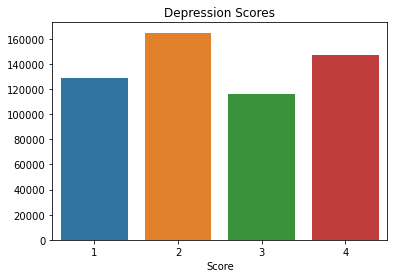

In [12]:
bar_dep = [(depression_q[depression_q == i].sum(axis=1).sum())/(i) for i in range(1,5)]
ax_dep=sns.barplot(x = [1,2,3,4], y=bar_dep)
ax_dep.set_xlabel('Score')
ax_dep.set_title('Depression Scores')

Dari hasil visualisasi pada hasil respon kategori pertanyaan depression dapat diketahui bahwa response pada opsi kedua (Applied to me to some degree, or some of the time) adalah yang terbanyak namun persebaran datanya cukup merata.

Text(0.5, 1.0, 'Stress Scores')

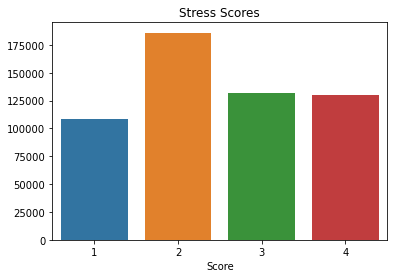

In [13]:
bar_str = [(stress_q[stress_q == i].sum(axis=1).sum())/(i) for i in range(1,5)]
ax_str=sns.barplot(x = [1,2,3,4], y=bar_str)
ax_str.set_xlabel('Score')
ax_str.set_title('Stress Scores')

Dari hasil visualisasi pada hasil respon kategori pertanyaan stress dapat diketahui bahwa response pada opsi kedua (Applied to me to some degree, or some of the time) juga terbanyak.

Text(0.5, 1.0, 'Anxiety Scores')

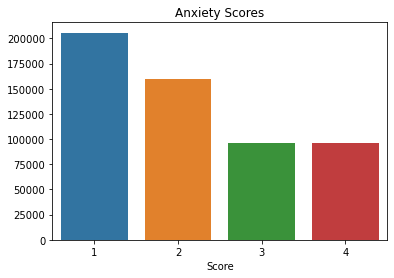

In [14]:
bar_anx = [(anxiety_q[anxiety_q == i].sum(axis=1).sum())/(i) for i in range(1,5)]
ax_anx=sns.barplot(x = [1,2,3,4], y=bar_anx)
ax_anx.set_xlabel('Score')
ax_anx.set_title('Anxiety Scores')

Dari hasil visualisasi pada hasil respon kategori pertanyaan anxiety dapat diketahui bahwa response pada opsi pertama (Did not apply to me at all) lebih dominan daripada respon pada opsi yang lain.

#### Prepocessing Part 2

Berdasarkan hasil referensi di website sebelumnya ternyata nilai dari skor pertanyaan berkisar daro 0 hingga 3, namun melihat variansi skor sebelumnya adalah 1 hingga 4, sehingga agar mendapat label yang sesuai nantinya perlu dilakukan pengurangan 1 poin skor pada semua data

In [15]:
def sub(data):
    return data.subtract(1, axis=1)

depression_q = sub(depression_q)
stress_q = sub(stress_q)
anxiety_q = sub(anxiety_q)

In [16]:
depression_q['Q3A'].value_counts()

1    14062
0    11563
2     7744
3     6406
Name: Q3A, dtype: int64

Berikutnya menjumlah skor tiap responden (baris)

In [17]:
def scores(data):
    col = list(data)
    data["scores"] = data[col].sum(axis=1)
    return data

train_dep = scores(depression_q)
train_str = scores(stress_q)
train_anx = scores(anxiety_q)

In [18]:
train_dep.head()

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,Q34A,Q37A,Q38A,Q42A,scores
0,1,3,0,3,3,2,0,3,3,3,2,0,1,3,27
1,1,3,1,3,2,3,1,1,2,1,1,3,1,1,24
2,3,3,3,3,3,3,3,3,0,3,3,3,3,3,39
3,1,2,2,0,1,2,0,0,1,2,3,1,0,1,16
4,2,3,2,3,2,3,2,1,3,2,3,2,2,2,32


Selanjutnya adalah proses pelabelan berdasarkan skor yang diperoleh masing-masing responden

In [19]:
DASS_scores = {'Depression': [(0, 10), (10, 14), (14, 21), (21, 28)],
                'Anxiety': [(0, 8), (8, 10), (10, 15), (15, 20)],
                'Stress': [(0, 15), (15, 19), (19, 26), (26, 34)]}

In [20]:
def label(data, string):
    conditions = [
    ((data['scores'] >= DASS_scores[string][0][0])  & (data['scores'] < DASS_scores[string][0][1])),
    ((data['scores'] >= DASS_scores[string][1][0])  & (data['scores'] < DASS_scores[string][1][1])),
    ((data['scores'] >= DASS_scores[string][2][0])  & (data['scores'] < DASS_scores[string][2][1])),
    ((data['scores'] >= DASS_scores[string][3][0])  & (data['scores'] < DASS_scores[string][3][1])),
    (((data['scores'] >= DASS_scores[string][3][1])))
    ]
    values = ['Normal','Mild', 'Moderate', 'Severe', 'Extremely Severe']
    data['category'] = np.select(conditions, values)
    return data
    
train_dep = label(train_dep, 'Depression')
train_str = label(train_str, "Stress")
train_anx = label(train_anx, "Anxiety")

In [21]:
train_dep.head()

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,Q34A,Q37A,Q38A,Q42A,scores,category
0,1,3,0,3,3,2,0,3,3,3,2,0,1,3,27,Severe
1,1,3,1,3,2,3,1,1,2,1,1,3,1,1,24,Severe
2,3,3,3,3,3,3,3,3,0,3,3,3,3,3,39,Extremely Severe
3,1,2,2,0,1,2,0,0,1,2,3,1,0,1,16,Moderate
4,2,3,2,3,2,3,2,1,3,2,3,2,2,2,32,Extremely Severe


In [22]:
train_dep["category"] = train_dep["category"].apply(lambda x: f"Depression {x}")
train_anx["category"] = train_anx["category"].apply(lambda x: f"Anxious {x}")
train_str["category"] = train_str["category"].apply(lambda x: f"Stress {x}")

Melihat distribusi data setelah diberi label

In [23]:
train_dep["category"].value_counts()

Depression Extremely Severe    13577
Depression Normal               8856
Depression Moderate             7079
Depression Severe               6477
Depression Mild                 3786
Name: category, dtype: int64

In [24]:
train_str["category"].value_counts()

Stress Normal              11800
Stress Moderate             8730
Stress Severe               8575
Stress Extremely Severe     5749
Stress Mild                 4921
Name: category, dtype: int64

In [25]:
train_anx["category"].value_counts()

Anxious Extremely Severe    14122
Anxious Normal               9728
Anxious Moderate             7048
Anxious Severe               6113
Anxious Mild                 2764
Name: category, dtype: int64

#### Machine Learning

Memisahkan Data Training dan Target/Label

In [26]:
X_dep = train_dep.drop(["category"], axis=1)
y_dep = train_dep["category"]

X_str = train_str.drop(["category"], axis=1)
y_str = train_str["category"]

X_anx = train_anx.drop(["category"], axis=1)
y_anx = train_anx["category"]

Split Data Training

In [27]:
from sklearn.model_selection import train_test_split

X_dep_train, X_dep_test, y_dep_train, y_dep_test = train_test_split(X_dep, y_dep, test_size=0.2, stratify=y_dep)
X_str_train, X_str_test, y_str_train, y_str_test = train_test_split(X_str, y_str, test_size=0.2, stratify=y_str)
X_anx_train, X_anx_test, y_anx_train, y_anx_test = train_test_split(X_anx, y_anx, test_size=0.2, stratify=y_anx)


Import Library

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [29]:
# random forest
rf = RandomForestClassifier()
rf.fit(X_dep_train, y_dep_train)

# testing
y_pred = rf.predict(X_dep_test)

# evaluasi
print(classification_report(y_dep_test, y_pred))

                             precision    recall  f1-score   support

Depression Extremely Severe       1.00      1.00      1.00      2715
            Depression Mild       1.00      1.00      1.00       757
        Depression Moderate       1.00      1.00      1.00      1416
          Depression Normal       1.00      1.00      1.00      1771
          Depression Severe       1.00      1.00      1.00      1296

                   accuracy                           1.00      7955
                  macro avg       1.00      1.00      1.00      7955
               weighted avg       1.00      1.00      1.00      7955



In [30]:
# random forest
rf = RandomForestClassifier()
rf.fit(X_str_train, y_str_train)

# testing
y_pred = rf.predict(X_str_test)

# evaluasi
print(classification_report(y_str_test, y_pred))

                         precision    recall  f1-score   support

Stress Extremely Severe       1.00      1.00      1.00      1150
            Stress Mild       1.00      1.00      1.00       984
        Stress Moderate       1.00      1.00      1.00      1746
          Stress Normal       1.00      1.00      1.00      2360
          Stress Severe       1.00      1.00      1.00      1715

               accuracy                           1.00      7955
              macro avg       1.00      1.00      1.00      7955
           weighted avg       1.00      1.00      1.00      7955



In [31]:
# random forest
rf = RandomForestClassifier()
rf.fit(X_anx_train, y_anx_train)

# testing
y_pred = rf.predict(X_anx_test)

# evaluasi
print(classification_report(y_anx_test, y_pred))

                          precision    recall  f1-score   support

Anxious Extremely Severe       1.00      1.00      1.00      2824
            Anxious Mild       1.00      1.00      1.00       553
        Anxious Moderate       1.00      1.00      1.00      1409
          Anxious Normal       1.00      1.00      1.00      1946
          Anxious Severe       1.00      1.00      1.00      1223

                accuracy                           1.00      7955
               macro avg       1.00      1.00      1.00      7955
            weighted avg       1.00      1.00      1.00      7955



In [32]:
# train model decision tree
tree = DecisionTreeClassifier()
tree.fit(X_dep_train, y_dep_train)

# testing
y_pred = tree.predict(X_dep_test)

# evaluasi
print(classification_report(y_dep_test, y_pred))

                             precision    recall  f1-score   support

Depression Extremely Severe       1.00      1.00      1.00      2715
            Depression Mild       1.00      1.00      1.00       757
        Depression Moderate       1.00      1.00      1.00      1416
          Depression Normal       1.00      1.00      1.00      1771
          Depression Severe       1.00      1.00      1.00      1296

                   accuracy                           1.00      7955
                  macro avg       1.00      1.00      1.00      7955
               weighted avg       1.00      1.00      1.00      7955



In [33]:
# train model decision tree
tree = DecisionTreeClassifier()
tree.fit(X_str_train, y_str_train)

# testing
y_pred = tree.predict(X_str_test)

# evaluasi
print(classification_report(y_str_test, y_pred))

                         precision    recall  f1-score   support

Stress Extremely Severe       1.00      1.00      1.00      1150
            Stress Mild       1.00      1.00      1.00       984
        Stress Moderate       1.00      1.00      1.00      1746
          Stress Normal       1.00      1.00      1.00      2360
          Stress Severe       1.00      1.00      1.00      1715

               accuracy                           1.00      7955
              macro avg       1.00      1.00      1.00      7955
           weighted avg       1.00      1.00      1.00      7955



In [34]:
# train model decision tree
tree = DecisionTreeClassifier()
tree.fit(X_anx_train, y_anx_train)

# testing
y_pred = tree.predict(X_anx_test)

# evaluasi
print(classification_report(y_anx_test, y_pred))

                          precision    recall  f1-score   support

Anxious Extremely Severe       1.00      1.00      1.00      2824
            Anxious Mild       1.00      1.00      1.00       553
        Anxious Moderate       1.00      1.00      1.00      1409
          Anxious Normal       1.00      1.00      1.00      1946
          Anxious Severe       1.00      1.00      1.00      1223

                accuracy                           1.00      7955
               macro avg       1.00      1.00      1.00      7955
            weighted avg       1.00      1.00      1.00      7955



In [35]:
# train model knn
knn = KNeighborsClassifier()
knn.fit(X_dep_train, y_dep_train)

# testing
y_pred = knn.predict(X_dep_test)

# evaluasi
print(classification_report(y_dep_test, y_pred))

                             precision    recall  f1-score   support

Depression Extremely Severe       0.99      0.99      0.99      2715
            Depression Mild       0.99      0.96      0.98       757
        Depression Moderate       0.96      1.00      0.98      1416
          Depression Normal       0.98      1.00      0.99      1771
          Depression Severe       0.98      0.94      0.96      1296

                   accuracy                           0.98      7955
                  macro avg       0.98      0.98      0.98      7955
               weighted avg       0.98      0.98      0.98      7955



In [36]:
# train model knn
knn = KNeighborsClassifier()
knn.fit(X_str_train, y_str_train)

# testing
y_pred = knn.predict(X_str_test)

# evaluasi
print(classification_report(y_str_test, y_pred))

                         precision    recall  f1-score   support

Stress Extremely Severe       0.99      0.98      0.99      1150
            Stress Mild       0.92      0.95      0.93       984
        Stress Moderate       0.99      0.95      0.97      1746
          Stress Normal       0.98      1.00      0.99      2360
          Stress Severe       0.98      0.99      0.99      1715

               accuracy                           0.98      7955
              macro avg       0.97      0.97      0.97      7955
           weighted avg       0.98      0.98      0.98      7955



In [37]:
# train model knn
knn = KNeighborsClassifier()
knn.fit(X_anx_train, y_anx_train)

# testing
y_pred = knn.predict(X_anx_test)

# evaluasi
print(classification_report(y_anx_test, y_pred))

                          precision    recall  f1-score   support

Anxious Extremely Severe       1.00      0.99      1.00      2824
            Anxious Mild       0.95      0.75      0.84       553
        Anxious Moderate       0.94      0.98      0.96      1409
          Anxious Normal       0.94      1.00      0.97      1946
          Anxious Severe       0.98      0.92      0.95      1223

                accuracy                           0.97      7955
               macro avg       0.96      0.93      0.94      7955
            weighted avg       0.97      0.97      0.96      7955



Dari semua hasil modeling sebelumnya disini saya akan menggunakan model Decision Tree untuk Deployment yang dimana model tersebut menghasilkan rata-rata nilai akurasi yang terbaik dibandingkan model lainnya